In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from keras.models import Sequential


Using TensorFlow backend.


In [2]:
train = pd.read_csv("/home/charmi/Documents/Small_Projects/Handwritten_digit_recognition/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("/home/charmi/Documents/Small_Projects/Handwritten_digit_recognition/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train = (train.iloc[:,1:].values)
y_train = train.iloc[:,0]
x_test = test.values

In [5]:
x_train
x_train.shape

(42000, 784)

In [6]:
y_train
y_train.shape

(42000,)

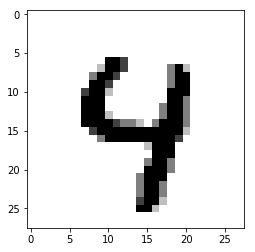

In [7]:
d = x_train[78]
d.shape=(28, 28)
plt.imshow(225-d,cmap = 'gray')

In [8]:
mean_trx = x_train.mean().astype(np.float32)
std_trx = x_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_trx)/std_trx

In [9]:
x_train = standardize(x_train)
x_train

array([[-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
        -0.42462978, -0.42462978],
       [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
        -0.42462978, -0.42462978],
       [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
        -0.42462978, -0.42462978],
       ...,
       [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
        -0.42462978, -0.42462978],
       [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
        -0.42462978, -0.42462978],
       [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
        -0.42462978, -0.42462978]])

In [10]:
x_test = standardize(x_test)
x_test

array([[-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
        -0.42462978, -0.42462978],
       [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
        -0.42462978, -0.42462978],
       [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
        -0.42462978, -0.42462978],
       ...,
       [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
        -0.42462978, -0.42462978],
       [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
        -0.42462978, -0.42462978],
       [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
        -0.42462978, -0.42462978]])

In [11]:
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28))

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28))

In [13]:
x_train.shape

(42000, 28, 28)

In [14]:
x_test.shape

(28000, 28, 28)

In [15]:
from keras.utils import np_utils
# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(y_train) 

In [16]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [28]:
num_classes = y_train.shape[1]

10

In [19]:
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

In [22]:
x_train.shape

(42000, 1, 28, 28)

In [23]:
x_test.shape

(28000, 1, 28, 28)

In [29]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [30]:
# build the model
model = baseline_model()
# Fit the model
model.fit(x_train, y_train, validation_split=0.13, epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model

preds = model.predict_classes(x_test, verbose=0)

def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

write_preds(preds, "keras-SingleLayer_CNN.csv")

W0723 12:23:38.640831 139634527151936 deprecation_wrapper.py:119] From /home/charmi/miniconda3/envs/av/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 12:23:38.908934 139634527151936 deprecation.py:323] From /home/charmi/miniconda3/envs/av/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36540 samples, validate on 5460 samples
Epoch 1/10
 - 32s - loss: 0.2374 - acc: 0.9278 - val_loss: 0.1008 - val_acc: 0.9687
Epoch 2/10
 - 27s - loss: 0.0751 - acc: 0.9771 - val_loss: 0.0656 - val_acc: 0.9797
Epoch 3/10
 - 27s - loss: 0.0507 - acc: 0.9835 - val_loss: 0.0594 - val_acc: 0.9808
Epoch 4/10
 - 27s - loss: 0.0407 - acc: 0.9870 - val_loss: 0.0572 - val_acc: 0.9830
Epoch 5/10
 - 27s - loss: 0.0338 - acc: 0.9898 - val_loss: 0.0571 - val_acc: 0.9841
Epoch 6/10
 - 28s - loss: 0.0277 - acc: 0.9909 - val_loss: 0.0488 - val_acc: 0.9846
Epoch 7/10
 - 27s - loss: 0.0218 - acc: 0.9934 - val_loss: 0.0558 - val_acc: 0.9853
Epoch 8/10
 - 28s - loss: 0.0176 - acc: 0.9944 - val_loss: 0.0537 - val_acc: 0.9872
Epoch 9/10
 - 27s - loss: 0.0167 - acc: 0.9947 - val_loss: 0.0532 - val_acc: 0.9846
Epoch 10/10
 - 27s - loss: 0.0114 - acc: 0.9967 - val_loss: 0.0562 - val_acc: 0.9855
